In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.DiGraph()
pos = nx.spring_layout(G)

In [3]:
input_path = "gen_random_networks/20/sparse/002.txt"

In [4]:
class DSU:
    def __init__(self, n):
        self.n = n
        self.par = list(range(n))
        self.rk = [0]*n

    def find(self, x):
        if x == self.par[x]: return x
        return self.find(self.par[x])
    
    def join(self, x, y):
        x = self.find(x)
        y = self.find(y)
        if x == y: return
        if self.rk[x] < self.rk[y]:
            x, y = y, x
        self.par[y] = x
        if self.rk[x] == self.rk[y]:
            self.rk[x] += 1

class Node:
    def __init__(self, id, x, y):
        self.id = id
        self.x = x
        self.y = y
        self.edges = []

class Edge:
    def __init__(self, endpoint1, endpoint2):
        self.endpoint1 = endpoint1
        self.endpoint2 = endpoint2
        self.length = 1

    def get_other_endpoint_id(self, u_id):
        return self.endpoint1.id + self.endpoint2.id - u_id

class Graph:
    def __init__(self):
        self.nodes = []
        self.complete_edges = []

    def build_mst(self):
        print("MST edges:")
        self.complete_edges = sorted(self.complete_edges, key=lambda e: (e.endpoint1.id, e.endpoint2.id))
        self.mst_edges = []
        self.n = len(self.nodes)
        dsu = DSU(self.n)
        cnt = 0
        for i in range(len(self.complete_edges)):
            edge = self.complete_edges[i]
            x = edge.endpoint1.id
            y = edge.endpoint2.id
            x1 = dsu.find(x)
            y1 = dsu.find(y)
            if x1 == y1: continue
            dsu.join(x1,y1)
            print(f"\tEdge({x},{y})")
            self.mst_edges.append((x,y))
            cnt += 1
            if cnt == self.n - 1: break
        print(self.mst_edges)
        return self.mst_edges

In [5]:
def draw_graph(input_path, figsize=10, MIS_nodes=[]):
    with open(input_path, "r") as f:
        input_data = f.readlines()
        input_data = list(map(lambda x : x.strip("\r\n"), input_data))
    (n, m, r) = map(float, input_data[0].split()[:-1])
    n = int(n)
    m = int(m)
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    pos = {}
    
    G1 = Graph()
    
    for k in range(n):
        node_id, x, y = map(int, input_data[1 + k].split())
        pos[node_id] = (x,y)
        G1.nodes.append(Node(node_id, x, y))
        
    already = set()
    for k in range(m):
        i, j = map(int, input_data[n + 1 + k].split())
        if i > j: i, j = j, i
        if (i,j) in already: continue
        if i == 0 or j == 0: print("(i,j) =", i, j)
        already.add((i,j))
        G.add_edge(i, j, weight=1)
        G1.complete_edges.append(Edge(G1.nodes[i], G1.nodes[j]))

    mst_edges = G1.build_mst()
        
    plt.figure(figsize=(figsize, figsize))
    edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    print("edges = ")
    print(edges)
    
    node_color = ['yellow']*n
    for MIS_node in MIS_nodes:
        node_color[MIS_node] = 'red'
    
    nx.draw(G, pos, node_color=node_color, with_labels=True,
            edgelist=edges, edge_color=(0,0,0,0.1))
    nx.draw(G, pos, node_color=node_color, with_labels=True,
            edgelist=mst_edges, edge_color='black')
    input_file = '-'.join(input_path.split('/')[1:])
    fig_path = "results/" + input_file + ".pdf"
    print("fig_path =", fig_path)
    plt.savefig(fig_path)

(i,j) = 0 10
(i,j) = 0 12
(i,j) = 0 3
(i,j) = 0 9
(i,j) = 0 17
(i,j) = 0 19
(i,j) = 0 11
(i,j) = 0 13
(i,j) = 0 15
MST edges:
	Edge(0,3)
	Edge(0,9)
	Edge(0,10)
	Edge(0,11)
	Edge(0,12)
	Edge(0,13)
	Edge(0,15)
	Edge(0,17)
	Edge(0,19)
	Edge(1,3)
	Edge(1,5)
	Edge(1,14)
	Edge(2,4)
	Edge(2,6)
	Edge(2,7)
	Edge(2,8)
	Edge(2,14)
	Edge(2,16)
	Edge(7,18)
[(0, 3), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 15), (0, 17), (0, 19), (1, 3), (1, 5), (1, 14), (2, 4), (2, 6), (2, 7), (2, 8), (2, 14), (2, 16), (7, 18)]
edges = 
((0, 10), (0, 12), (0, 3), (0, 9), (0, 17), (0, 19), (0, 11), (0, 13), (0, 15), (1, 5), (1, 15), (1, 14), (1, 11), (1, 19), (1, 12), (1, 3), (1, 9), (2, 4), (2, 7), (2, 6), (2, 8), (2, 14), (2, 16), (3, 9), (3, 19), (3, 11), (3, 12), (3, 10), (3, 15), (3, 5), (3, 17), (3, 14), (4, 7), (4, 14), (4, 6), (4, 8), (4, 5), (4, 12), (4, 15), (4, 16), (5, 15), (5, 14), (5, 12), (5, 11), (5, 19), (5, 9), (6, 8), (6, 16), (6, 7), (7, 16), (7, 8), (7, 13), (7, 18), (8, 16), (9, 19), (9, 

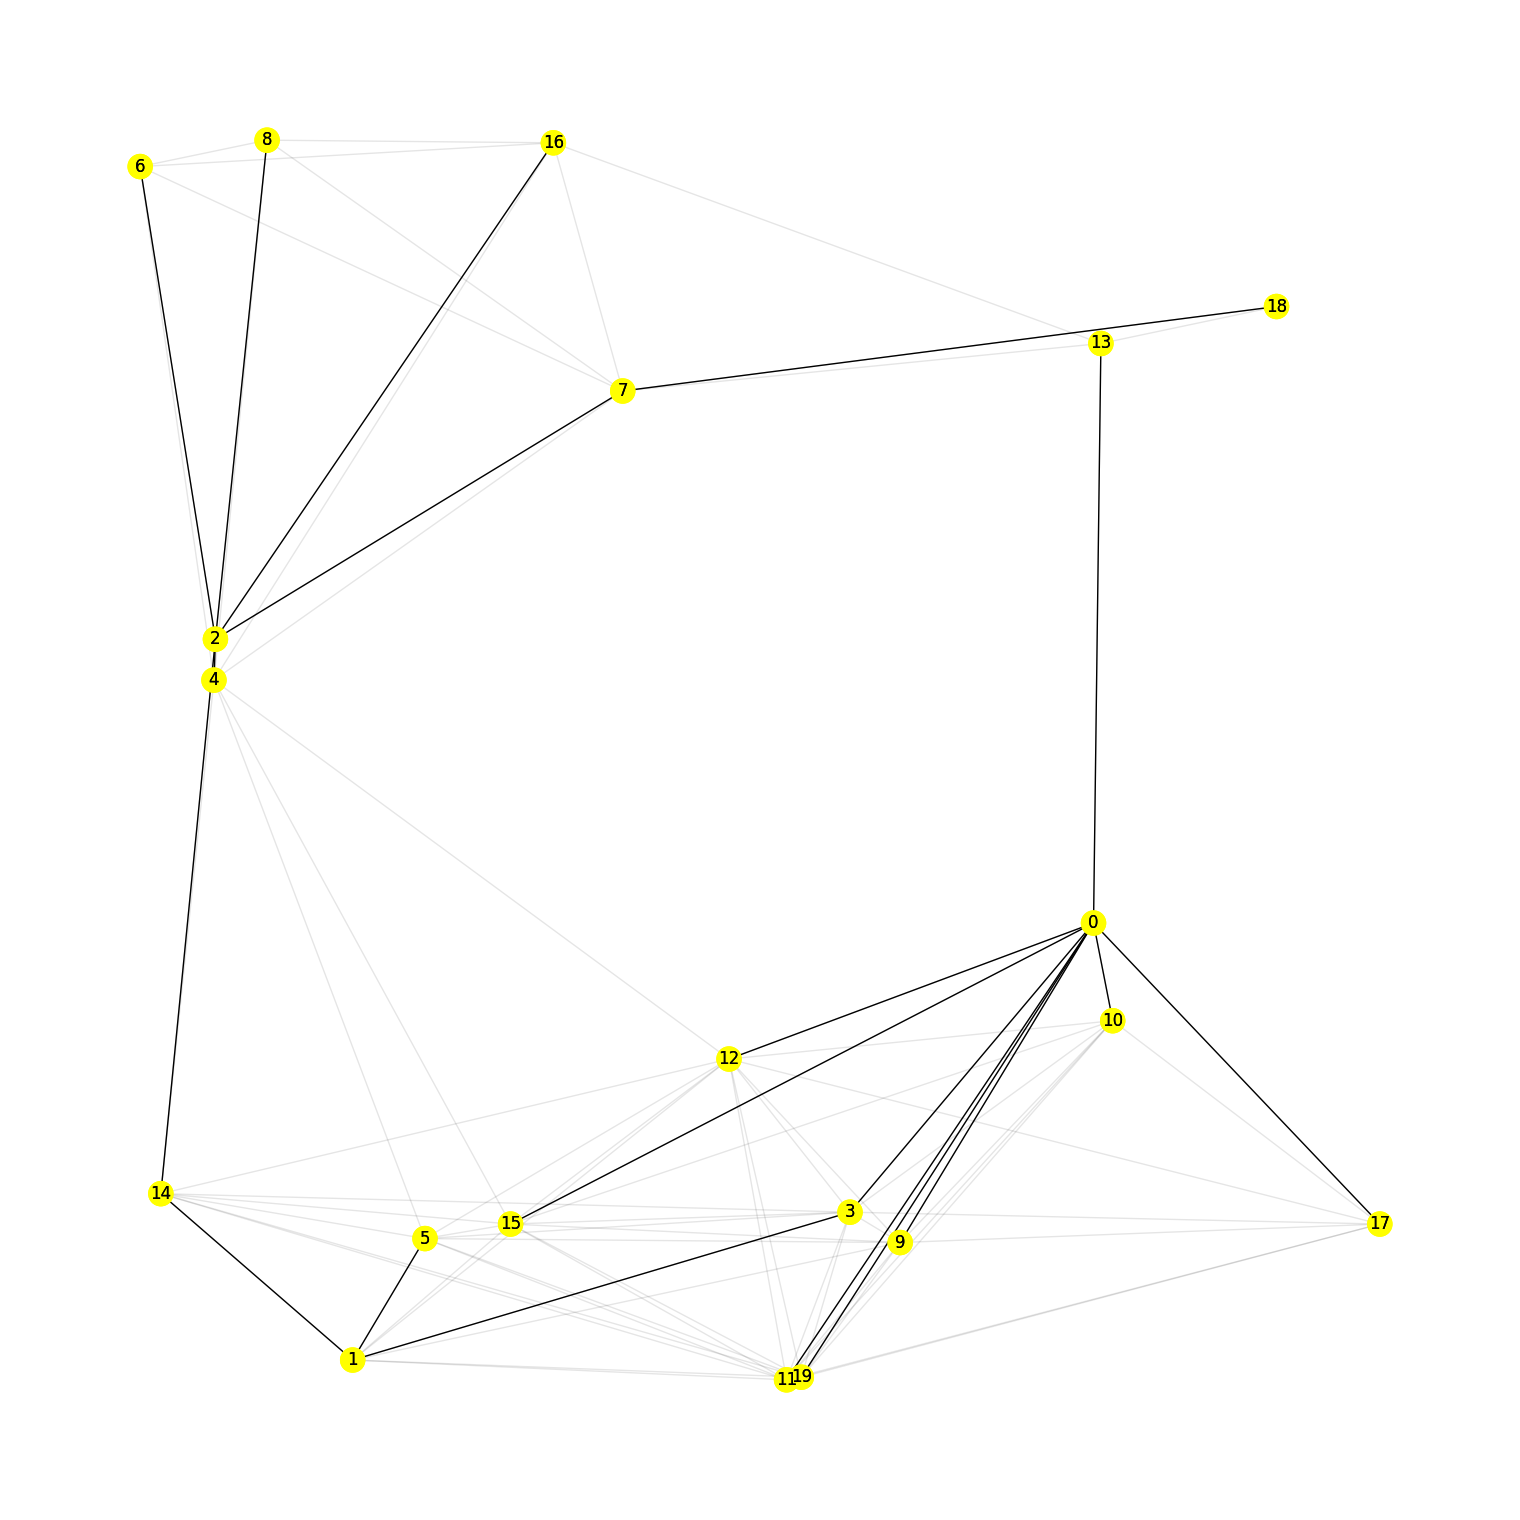

In [9]:
draw_graph(input_path, figsize=15)

(i,j) = 0 24
(i,j) = 0 49
(i,j) = 0 20
(i,j) = 0 43
(i,j) = 0 12
(i,j) = 0 41
MST edges:
	Edge(0,12)
	Edge(0,20)
	Edge(0,24)
	Edge(0,41)
	Edge(0,43)
	Edge(0,49)
	Edge(1,3)
	Edge(1,4)
	Edge(1,5)
	Edge(1,10)
	Edge(1,11)
	Edge(1,21)
	Edge(1,25)
	Edge(1,27)
	Edge(1,31)
	Edge(1,35)
	Edge(1,37)
	Edge(1,46)
	Edge(2,12)
	Edge(2,15)
	Edge(2,17)
	Edge(2,19)
	Edge(2,29)
	Edge(2,32)
	Edge(2,40)
	Edge(2,42)
	Edge(2,44)
	Edge(3,28)
	Edge(4,14)
	Edge(4,45)
	Edge(6,9)
	Edge(6,18)
	Edge(6,34)
	Edge(6,47)
	Edge(7,37)
	Edge(7,39)
	Edge(8,14)
	Edge(8,22)
	Edge(8,30)
	Edge(8,36)
	Edge(8,38)
	Edge(9,16)
	Edge(9,41)
	Edge(12,48)
	Edge(13,23)
	Edge(13,33)
	Edge(13,46)
	Edge(13,48)
	Edge(15,26)
[(0, 12), (0, 20), (0, 24), (0, 41), (0, 43), (0, 49), (1, 3), (1, 4), (1, 5), (1, 10), (1, 11), (1, 21), (1, 25), (1, 27), (1, 31), (1, 35), (1, 37), (1, 46), (2, 12), (2, 15), (2, 17), (2, 19), (2, 29), (2, 32), (2, 40), (2, 42), (2, 44), (3, 28), (4, 14), (4, 45), (6, 9), (6, 18), (6, 34), (6, 47), (7, 37), (7, 39), 

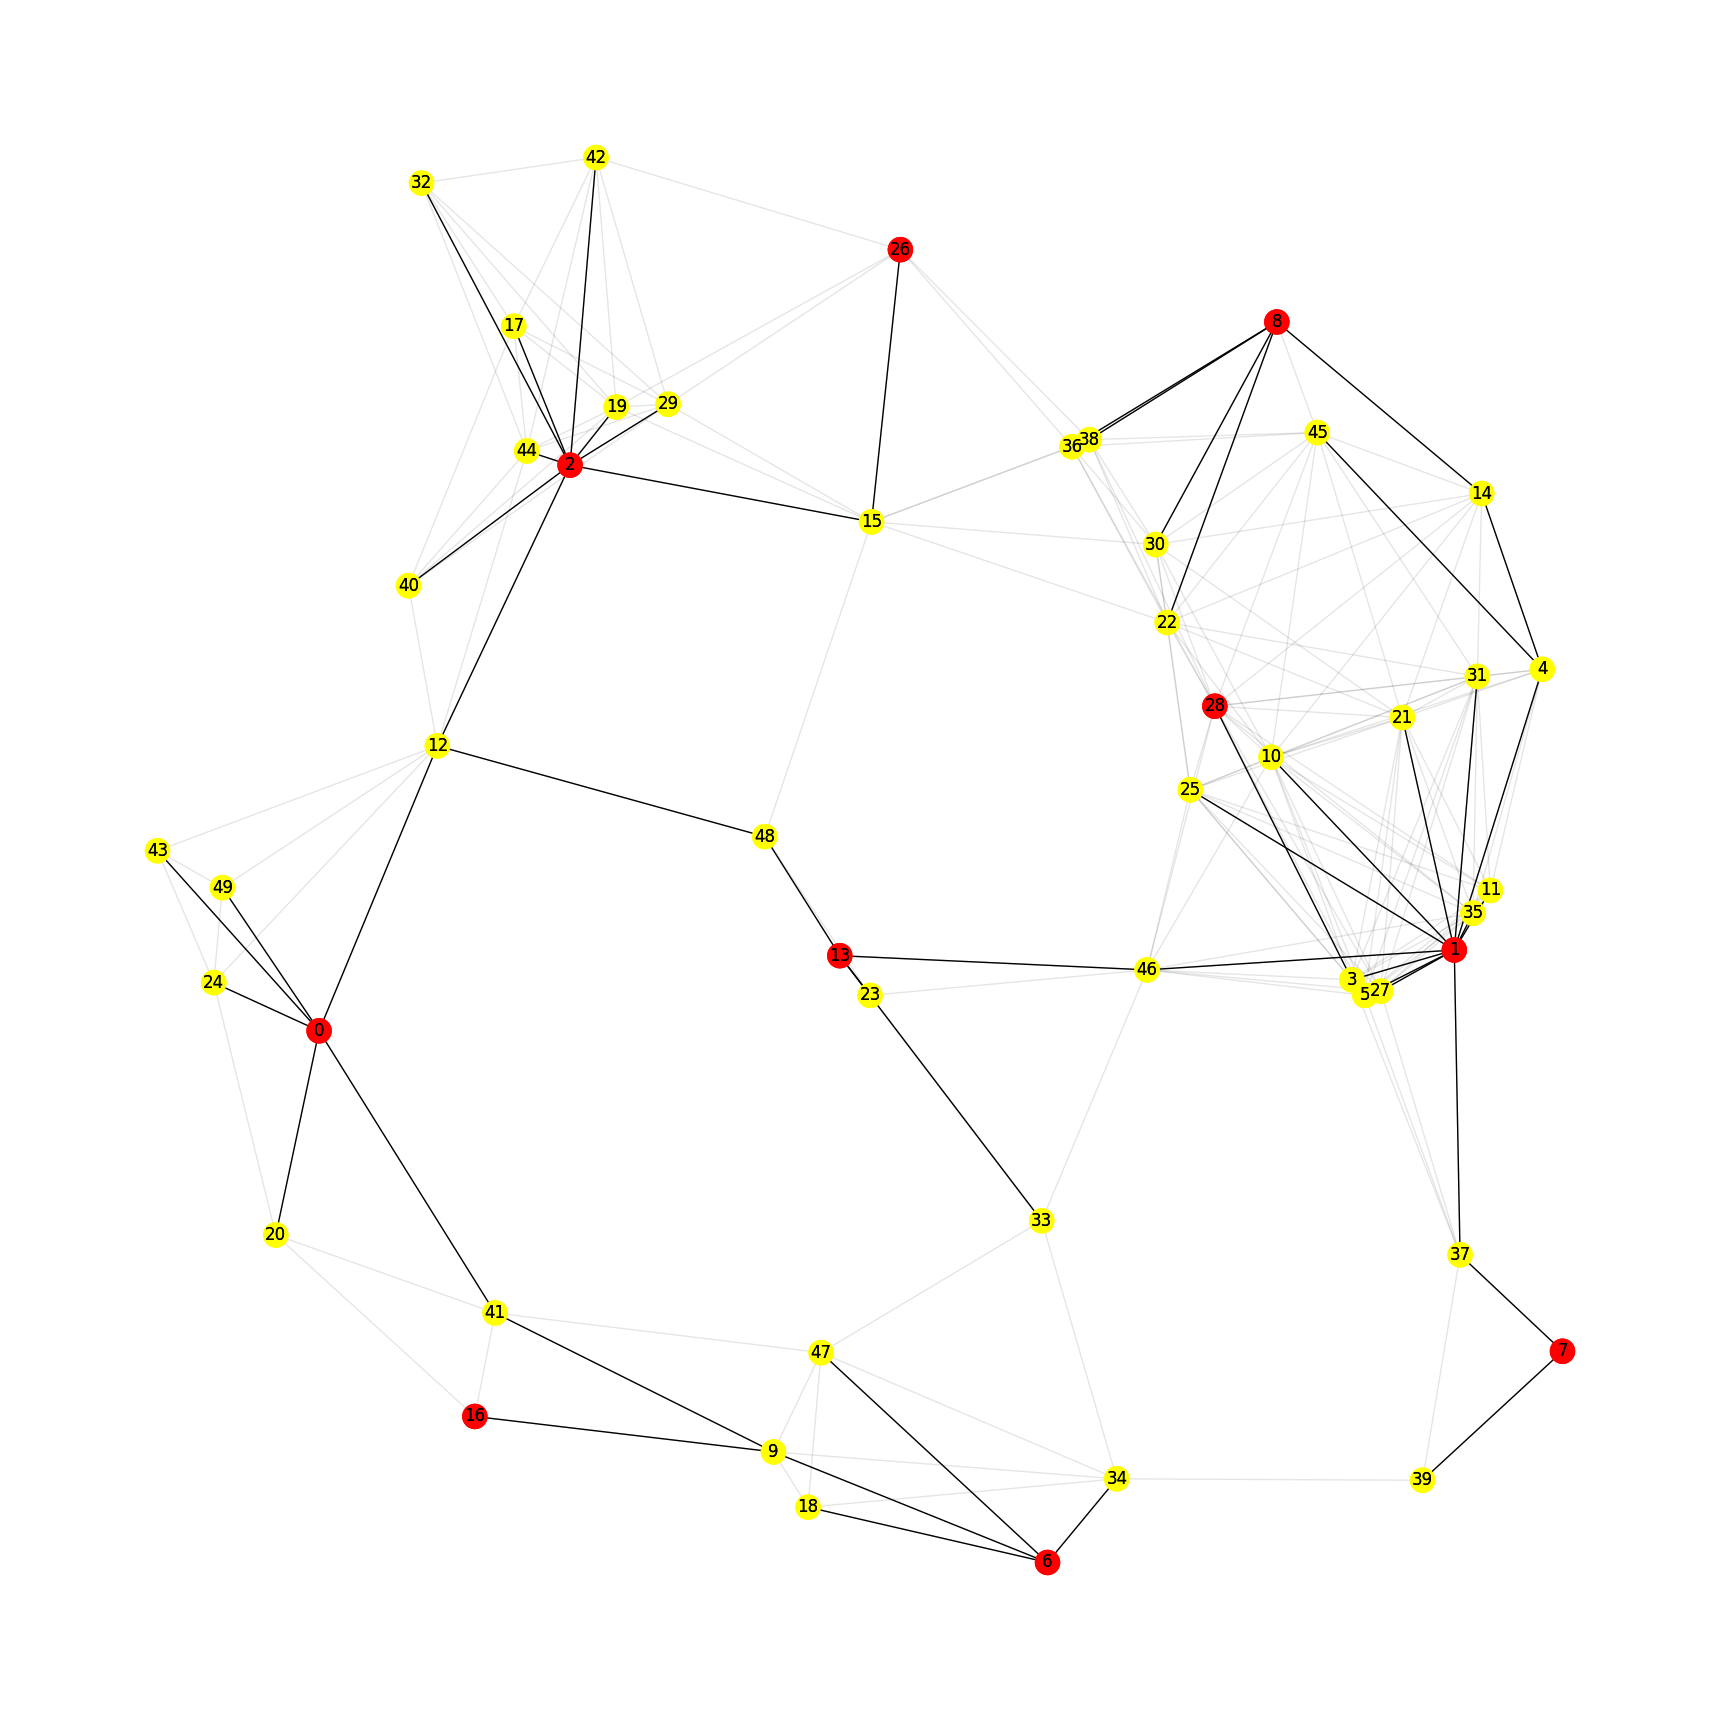

In [21]:
draw_graph("gen_random_networks/50/sparse/032.txt", figsize=17, MIS_nodes=[0,1,2,6,7,8,13,16,26,28])

(i,j) = 0 4
(i,j) = 0 3
(i,j) = 0 19
(i,j) = 0 6
(i,j) = 0 12
(i,j) = 0 8
(i,j) = 0 13
MST edges:
	Edge(0,3)
	Edge(0,4)
	Edge(0,6)
	Edge(0,8)
	Edge(0,12)
	Edge(0,13)
	Edge(0,19)
	Edge(1,2)
	Edge(1,5)
	Edge(1,7)
	Edge(1,8)
	Edge(1,9)
	Edge(1,11)
	Edge(1,14)
	Edge(1,15)
	Edge(1,16)
	Edge(1,17)
	Edge(1,18)
	Edge(10,20)
	Edge(10,21)
	Edge(11,20)
[(0, 3), (0, 4), (0, 6), (0, 8), (0, 12), (0, 13), (0, 19), (1, 2), (1, 5), (1, 7), (1, 8), (1, 9), (1, 11), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (10, 20), (10, 21), (11, 20)]
edges = 
((0, 4), (0, 3), (0, 19), (0, 6), (0, 12), (0, 8), (0, 13), (1, 14), (1, 5), (1, 9), (1, 16), (1, 15), (1, 7), (1, 18), (1, 8), (1, 17), (1, 2), (1, 11), (1, 13), (2, 7), (2, 15), (2, 9), (2, 11), (2, 14), (3, 19), (3, 4), (3, 6), (3, 12), (4, 19), (4, 6), (4, 12), (4, 8), (4, 13), (5, 16), (5, 14), (5, 17), (5, 9), (5, 8), (5, 18), (5, 7), (5, 15), (6, 12), (6, 13), (6, 18), (6, 19), (6, 8), (7, 15), (7, 9), (7, 11), (7, 14), (8, 16), (8, 12), (8, 18), (8, 1

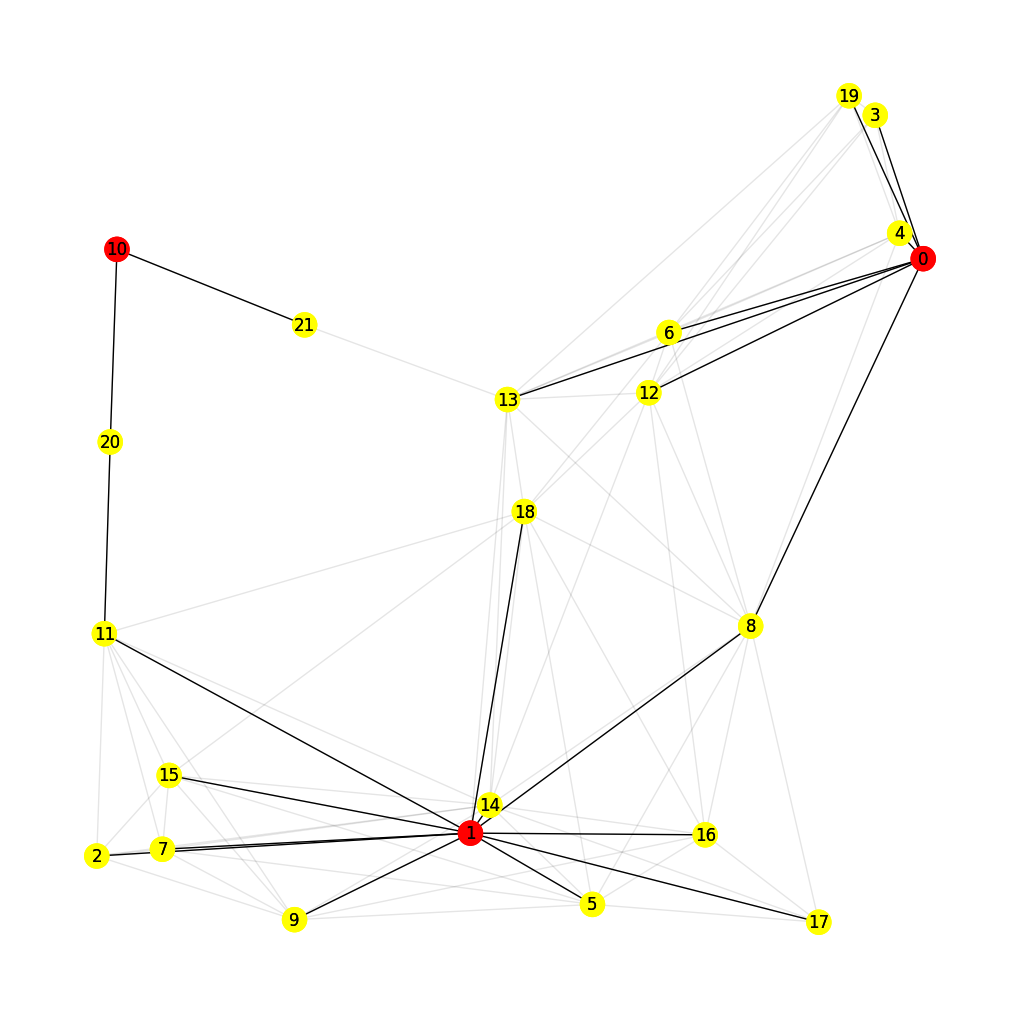

In [24]:
draw_graph("gen_random_networks/20/sparse/050.txt", MIS_nodes=[0,1,10])